<a href="https://colab.research.google.com/github/Ayush8795/image-classification/blob/main/FashionImageClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import os
import cv2
import tensorflow
import pandas as pd
from imutils import paths

In [ ]:
datafilepath= "/content/drive/MyDrive/Flipkart/FASHION"
epoch= 50

In [ ]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split as tts

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
outputmodel= "/content/drive/MyDrive/Flipkart/model_output/imgclassmodel"
outputlabelbinarizer= "/content/drive/MyDrive/Flipkart/model_output/imgclassbin"

In [ ]:
fashionlabels=set(['Caps and Hats','Lower Wears','Shoes and Boots','Upper Wears'])
print("Images is being loaded...")
pathToImages= list(paths.list_images(datafilepath))
data=[]
labels=[]

for images in pathToImages:
  label= images.split(os.path.sep)[-2]
  if label not in fashionlabels:
    continue
  image= cv2.imread(images)
  image= cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image= cv2.resize(image,(224,224))
  data.append(image)
  labels.append(label)

Images is being loaded...


In [ ]:
print(labels)

['Lower Wears', 'Lower Wears', 'Lower Wears', 'Lower Wears', 'Lower Wears', 'Lower Wears', 'Lower Wears', 'Lower Wears', 'Lower Wears', 'Lower Wears', 'Lower Wears', 'Lower Wears', 'Lower Wears', 'Lower Wears', 'Lower Wears', 'Lower Wears', 'Lower Wears', 'Lower Wears', 'Lower Wears', 'Lower Wears', 'Lower Wears', 'Lower Wears', 'Lower Wears', 'Lower Wears', 'Lower Wears', 'Lower Wears', 'Lower Wears', 'Lower Wears', 'Lower Wears', 'Lower Wears', 'Lower Wears', 'Lower Wears', 'Lower Wears', 'Lower Wears', 'Lower Wears', 'Lower Wears', 'Lower Wears', 'Lower Wears', 'Lower Wears', 'Lower Wears', 'Lower Wears', 'Lower Wears', 'Lower Wears', 'Shoes and Boots', 'Shoes and Boots', 'Shoes and Boots', 'Shoes and Boots', 'Shoes and Boots', 'Shoes and Boots', 'Shoes and Boots', 'Shoes and Boots', 'Shoes and Boots', 'Shoes and Boots', 'Shoes and Boots', 'Shoes and Boots', 'Shoes and Boots', 'Shoes and Boots', 'Shoes and Boots', 'Shoes and Boots', 'Shoes and Boots', 'Shoes and Boots', 'Shoes and B

In [ ]:
data= np.array(data)
labels= np.array(labels)

lb= LabelBinarizer()
labels= lb.fit_transform(labels)

In [ ]:
(x_train,x_test,y_train,y_test)= tts(data, labels, test_size=0.25, stratify= labels, random_state= 42)

In [ ]:
trainAug= ImageDataGenerator(
    rotation_range= 30,
    zoom_range= 0.15,
    width_shift_range= 0.2,
    height_shift_range= 0.2,
    shear_range= 0.15,
    horizontal_flip= True,
    fill_mode= "nearest"
)

validAug= ImageDataGenerator()
mean= np.array([123.68,116.779,103.939],dtype= "float32")
trainAug.mean= mean
validAug.mean= mean

In [ ]:
from tensorflow import keras as k

In [ ]:
from keras.layers import Input
from keras.layers.pooling import AveragePooling2D
from keras.applications.resnet import ResNet50
from keras.layers.core import Flatten
from keras.layers.core import Dense

from keras.layers.core import Dropout
from keras.models import Model

In [ ]:
baseModel= ResNet50(weights= "imagenet", include_top= False, input_tensor=Input(shape=(224,244,3)))
headModel= baseModel.output
headModel= AveragePooling2D(pool_size=(7,7))(headModel)
headModel= Flatten(name= "flatten")(headModel)
headModel= Dense(512, activation= "relu")(headModel)
headModel= Dropout(0.5)(headModel)
headModel= Dense(len(lb.classes_),activation="softmax")(headModel)
model= Model(inputs= baseModel.inputs, outputs= headModel)
for bml in baseModel.layers:
  bml.trainable= False

94781440/94765736 [==============================] - 0s 0us/step


In [ ]:
from tensorflow.keras.optimizers import SGD

In [ ]:
opt= SGD(lr= 0.001, momentum= 0.9, decay= 1e-4/epoch)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
model.compile(loss= "categorical_crossentropy", optimizer= opt, metrics= ["accuracy"])

In [ ]:
History= model.fit_generator(
    trainAug.flow(x_train,y_train,batch_size=32),
    steps_per_epoch=len(x_train)//32,
    validation_data=validAug.flow(x_test,y_test),
    validation_steps= len(x_test)//32,
    epochs= epoch)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/50
5/5 [==============================] - 16s 566ms/step - loss: 2.1121 - accuracy: 0.2357 - val_loss: 1.3136 - val_accuracy: 0.5312
Epoch 2/50
5/5 [==============================] - 2s 393ms/step - loss: 1.5694 - accuracy: 0.4143 - val_loss: 0.8638 - val_accuracy: 0.6562
Epoch 3/50
5/5 [==============================] - 2s 331ms/step - loss: 1.0585 - accuracy: 0.5929 - val_loss: 0.7777 - val_accuracy: 0.6250
Epoch 4/50
5/5 [==============================] - 2s 383ms/step - loss: 0.7670 - accuracy: 0.7063 - val_loss: 0.7263 - val_accuracy: 0.7188
Epoch 5/50
5/5 [==============================] - 2s 392ms/step - loss: 0.6328 - accuracy: 0.7071 - val_loss: 0.2501 - val_accuracy: 0.9688
Epoch 6/50
5/5 [==============================] - 2s 332ms/step - loss: 0.4862 - accuracy: 0.8357 - val_loss: 0.4845 - val_accuracy: 0.8438
Epoch 7/50
5/5 [==============================] - 2s 388ms/step - loss: 0.3659 - accuracy: 0.8625 - val_loss: 0.5250 - val_accuracy: 0.8125
Epoch 8/50
5/5 [===

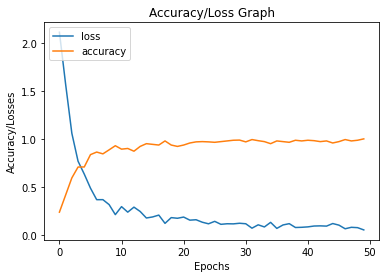

In [ ]:
import matplotlib.pyplot as plt
plt.plot(History.history['loss'])
plt.plot(History.history['accuracy'])
plt.ylabel('Accuracy/Losses')
plt.xlabel('Epochs')
plt.title("Accuracy/Loss Graph")
plt.legend(['loss','accuracy'],loc= 'upper left')
plt.show()

In [ ]:
import pickle

In [ ]:
model.save(outputmodel)
lbinarizer= open("/content/drive/MyDrive/Flipkart/model_output/imgclassmodel/imageclassificationbinarizer.pickle","wb")
lbinarizer.write(pickle.dumps(lb))
lbinarizer.close()

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Flipkart/model_output/imgclassmodel/assets


In [ ]:
from keras.models import load_model
from collections import deque
from google.colab.patches import cv2_imshow

In [ ]:
model= load_model("/content/drive/MyDrive/Flipkart/model_output/imgclassmodel")
lb= pickle.loads(open("/content/drive/MyDrive/Flipkart/model_output/imgclassmodel/imageclassificationbinarizer.pickle","rb").read())
#outputvideo= "/content/output_file/test_output.avi"
mean= np.array([123.68,116.779,103.939][::1],dtype="float32")
Queue= deque(maxlen=128)

In [ ]:
print(lb.classes_)

['Caps and Hats' 'Lower Wears' 'Shoes and Boots' 'Upper Wears']


In [ ]:
print(x_test)

In [ ]:
for img in x_test:
  image= np.array(img.resize((224,244)))
  print("shape ",image.shape)
  model.predict(image).round()

ValueError: ignored